# Training Model: SVM

# 9 month olds

## 1. Importing libraries ...

In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.ml_prep import prep_ml
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

## 2. Importing 9-Month-Olds..

In [2]:
#participants = ["904", "905", "906", "909", "910", "912", "908", "913", "914", "916", "917", "919", "920", "921", "923", "924","927", "928", "929", "930", "932"]
#participants = [ "909", "910", "912", "908", "913", "914", "916", "917", "919", "920", "921", "923", "924","927", "928", "929", "930", "932"]
participants = [ "909", "912", "908", "913", "914", "916", "917", "919", "920", "921", "924","927", "930"]




## 3. Set up averaging

loaded


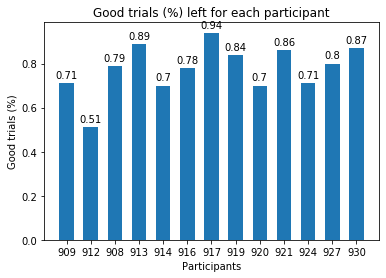

,909,912,908,913,914,916,917,919,920,921,924,927,930
1,0,1,2,2,0,2,2,3,1,2,0,3,3
2,2,1,1,2,2,2,2,2,1,1,2,3,3
3,1,2,3,4,1,1,2,3,1,2,3,2,3
4,1,0,3,3,1,2,2,3,2,2,2,3,2
5,1,1,1,3,2,2,1,2,2,3,2,3,2
6,2,0,1,3,2,1,2,3,1,1,1,2,2
7,2,1,2,4,2,2,2,3,1,2,2,4,1
8,2,2,2,3,2,1,2,3,2,1,2,3,3
9,2,2,3,4,0,2,2,3,2,1,1,2,2
10,2,1,3,2,1,2,2,3,2,2,2,3,2


loaded


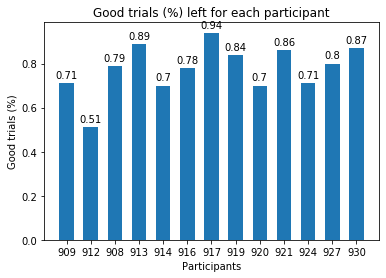

,909,912,908,913,914,916,917,919,920,921,924,927,930
1,0,1,2,2,0,2,2,3,1,2,0,3,3
2,2,1,1,2,2,2,2,2,1,1,2,3,3
3,1,2,3,4,1,1,2,3,1,2,3,2,3
4,1,0,3,3,1,2,2,3,2,2,2,3,2
5,1,1,1,3,2,2,1,2,2,3,2,3,2
6,2,0,1,3,2,1,2,3,1,1,1,2,2
7,2,1,2,4,2,2,2,3,1,2,2,4,1
8,2,2,2,3,2,1,2,3,2,1,2,3,3
9,2,2,3,4,0,2,2,3,2,1,1,2,2
10,2,1,3,2,1,2,2,3,2,2,2,3,2


loaded


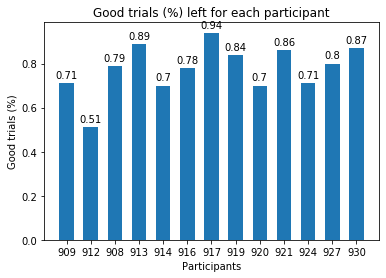

,909,912,908,913,914,916,917,919,920,921,924,927,930
1,0,1,2,2,0,2,2,3,1,2,0,3,3
2,2,1,1,2,2,2,2,2,1,1,2,3,3
3,1,2,3,4,1,1,2,3,1,2,3,2,3
4,1,0,3,3,1,2,2,3,2,2,2,3,2
5,1,1,1,3,2,2,1,2,2,3,2,3,2
6,2,0,1,3,2,1,2,3,1,1,1,2,2
7,2,1,2,4,2,2,2,3,1,2,2,4,1
8,2,2,2,3,2,1,2,3,2,1,2,3,3
9,2,2,3,4,0,2,2,3,2,1,1,2,2
10,2,1,3,2,1,2,2,3,2,2,2,3,2


In [3]:
X, y, good_trial_count = = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="no_averaging")
Xt, yt, good_trial_count_t = = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials")
Xa, ya, good_trial_count_a = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials_and_participants")


In [4]:
(n, d) = X.shape
assert n == y.shape[0]
n

800

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 396, 1.0: 404}

In [6]:
(n, d) = Xt.shape
assert n == yt.shape[0]
n

208

In [7]:
unique, counts = np.unique(yt, return_counts=True)
dict(zip(unique, counts))

{0.0: 104, 1.0: 104}

In [8]:
(n, d) = Xa.shape
assert n == ya.shape[0]
n

16

In [9]:
unique, counts = np.unique(ya, return_counts=True)
dict(zip(unique, counts))

{0.0: 8, 1.0: 8}

## 4. Setting up the SVM model ...

In [10]:
model = LinearSVC(C=1e-9, max_iter=5000)

## 5. Training and testing the model ...

### 5.1. Train on raw, test on raw (validation)

In [11]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(X) != y)

0.16875

### 5.2. Train on raw, test on avg by trial (word repetition) 

In [12]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xt) != yt)

0.5144230769230769

### 5.3. Train on raw, test on avg by word and ps 

In [13]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xa) != ya)

0.75

# Alternate accuracy measurements

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_concat, y, test_size=0.2)
model = SVC(gamma='scale')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

# 13 month olds

# 2. Importing 13-Month-Olds..

In [16]:
#participants = ["105", "106", "107", "109", "111", "112", "115", "116", "117", "119", "121", "122", "120", "124"]
participants = ["109", "111", "112", "115", "116", "117", "119", "121", "122", "120", "124"]

## 3. Set up averaging

loaded


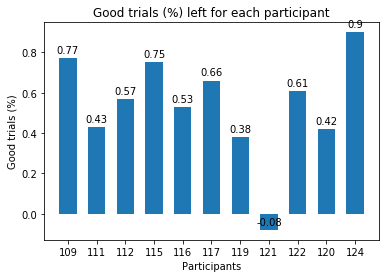

,109,111,112,115,116,117,119,121,122,120,124
1,1,3,2,3,2,-,2,0,2,1,3
2,3,1,2,4,0,0,0,1,2,0,4
3,3,1,0,4,0,1,2,0,1,0,3
4,3,1,3,4,0,2,1,0,1,1,2
5,3,0,1,3,0,2,2,0,1,1,3
6,3,3,3,3,1,0,0,0,1,1,3
7,3,2,2,3,1,1,1,0,1,1,4
8,2,1,2,4,1,1,1,-,1,0,3
9,3,2,0,2,1,2,0,-,2,0,3
10,4,3,2,4,1,1,0,1,1,-,3


loaded


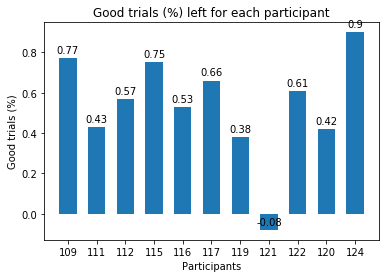

,109,111,112,115,116,117,119,121,122,120,124
1,1,3,2,3,2,-,2,0,2,1,3
2,3,1,2,4,0,0,0,1,2,0,4
3,3,1,0,4,0,1,2,0,1,0,3
4,3,1,3,4,0,2,1,0,1,1,2
5,3,0,1,3,0,2,2,0,1,1,3
6,3,3,3,3,1,0,0,0,1,1,3
7,3,2,2,3,1,1,1,0,1,1,4
8,2,1,2,4,1,1,1,-,1,0,3
9,3,2,0,2,1,2,0,-,2,0,3
10,4,3,2,4,1,1,0,1,1,-,3


loaded


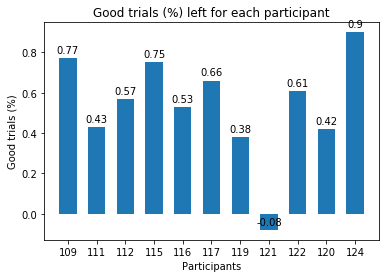

,109,111,112,115,116,117,119,121,122,120,124
1,1,3,2,3,2,-,2,0,2,1,3
2,3,1,2,4,0,0,0,1,2,0,4
3,3,1,0,4,0,1,2,0,1,0,3
4,3,1,3,4,0,2,1,0,1,1,2
5,3,0,1,3,0,2,2,0,1,1,3
6,3,3,3,3,1,0,0,0,1,1,3
7,3,2,2,3,1,1,1,0,1,1,4
8,2,1,2,4,1,1,1,-,1,0,3
9,3,2,0,2,1,2,0,-,2,0,3
10,4,3,2,4,1,1,0,1,1,-,3


ValueError: Unsupported averaging!

In [18]:
X, y, good_trial_count = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="no_averaging")
Xt, yt, good_trial_count_t = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials")
Xa, ya, good_trial_count_a = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials_and_particpants")

In [19]:
(n, d) = X.shape
assert n == y.shape[0]
n

573

In [27]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 289, 1.0: 284}

In [20]:
(n, d) = Xt.shape
assert n == yt.shape[0]
n

176

In [21]:
(n, d) = Xa.shape
assert n == ya.shape[0]
n

16

In [22]:
(n, d) = Xa.shape
(n,d)

(16, 60000)

## 4. Setting up the SVM model ...

In [23]:
model = LinearSVC(C=1e-9, max_iter=1000)

## 5. Training and testing the model ...

### 5.1. Train on raw, test on raw (validation)

In [24]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(X) != y)

0.21291448516579406

### 5.2. Train on raw, test on avg by trial (word repetition) 

In [25]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xt) != yt)

0.5056818181818182

### 5.3. Train on raw, test on avg by word and ps 

In [26]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xa) != ya)

0.5625

# All kids

## 2. Importing all kids

In [28]:
#participants = ["904", "905", "906", "909", "910", "912", "908", "913", "914", "916", "917", "919", "920", "921", "923", "924","105", "106", "107", "109", "111", "112", "115", "116", "117", "119", "121", "122", "120"]
participants = [ "909", "910", "912", "908", "913", "914", "916", "917", "919", "920", "921", "923", "924", "109", "111", "112", "115", "116", "117", "119", "121", "122", "120"]

## 3. Set up averaging

loaded


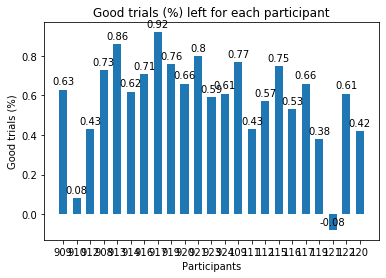

,909,910,912,908,913,914,916,917,919,920,...,109,111,112,115,116,117,119,121,122,120
1,0,1,1,2,2,-,2,2,2,0,...,1,3,2,3,2,-,2,0,2,1
2,2,0,1,1,2,2,2,2,2,0,...,3,1,2,4,0,0,0,1,2,0
3,1,0,1,3,4,0,1,2,3,1,...,3,1,0,4,0,1,2,0,1,0
4,1,0,0,3,1,1,2,2,2,1,...,3,1,3,4,0,2,1,0,1,1
5,0,1,1,1,3,2,2,1,2,2,...,3,0,1,3,0,2,2,0,1,1
6,2,-2,-,0,3,2,0,2,3,1,...,3,3,3,3,1,0,0,0,1,1
7,2,1,0,2,4,2,1,2,3,1,...,3,2,2,3,1,1,1,0,1,1
8,1,1,2,2,3,2,1,2,2,2,...,2,1,2,4,1,1,1,-,1,0
9,2,1,2,2,4,-,2,2,3,2,...,3,2,0,2,1,2,0,-,2,0
10,2,0,1,3,2,1,2,2,3,2,...,4,3,2,4,1,1,0,1,1,-


loaded


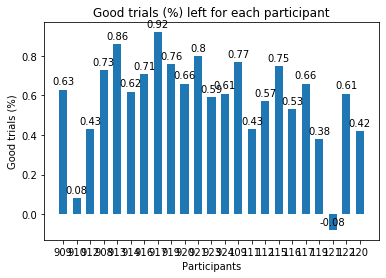

,909,910,912,908,913,914,916,917,919,920,...,109,111,112,115,116,117,119,121,122,120
1,0,1,1,2,2,-,2,2,2,0,...,1,3,2,3,2,-,2,0,2,1
2,2,0,1,1,2,2,2,2,2,0,...,3,1,2,4,0,0,0,1,2,0
3,1,0,1,3,4,0,1,2,3,1,...,3,1,0,4,0,1,2,0,1,0
4,1,0,0,3,1,1,2,2,2,1,...,3,1,3,4,0,2,1,0,1,1
5,0,1,1,1,3,2,2,1,2,2,...,3,0,1,3,0,2,2,0,1,1
6,2,-2,-,0,3,2,0,2,3,1,...,3,3,3,3,1,0,0,0,1,1
7,2,1,0,2,4,2,1,2,3,1,...,3,2,2,3,1,1,1,0,1,1
8,1,1,2,2,3,2,1,2,2,2,...,2,1,2,4,1,1,1,-,1,0
9,2,1,2,2,4,-,2,2,3,2,...,3,2,0,2,1,2,0,-,2,0
10,2,0,1,3,2,1,2,2,3,2,...,4,3,2,4,1,1,0,1,1,-


loaded


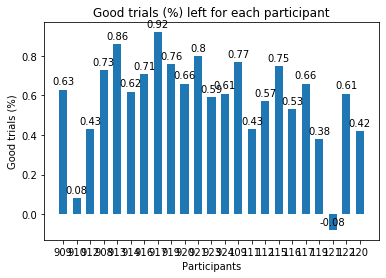

,909,910,912,908,913,914,916,917,919,920,...,109,111,112,115,116,117,119,121,122,120
1,0,1,1,2,2,-,2,2,2,0,...,1,3,2,3,2,-,2,0,2,1
2,2,0,1,1,2,2,2,2,2,0,...,3,1,2,4,0,0,0,1,2,0
3,1,0,1,3,4,0,1,2,3,1,...,3,1,0,4,0,1,2,0,1,0
4,1,0,0,3,1,1,2,2,2,1,...,3,1,3,4,0,2,1,0,1,1
5,0,1,1,1,3,2,2,1,2,2,...,3,0,1,3,0,2,2,0,1,1
6,2,-2,-,0,3,2,0,2,3,1,...,3,3,3,3,1,0,0,0,1,1
7,2,1,0,2,4,2,1,2,3,1,...,3,2,2,3,1,1,1,0,1,1
8,1,1,2,2,3,2,1,2,2,2,...,2,1,2,4,1,1,1,-,1,0
9,2,1,2,2,4,-,2,2,3,2,...,3,2,0,2,1,2,0,-,2,0
10,2,0,1,3,2,1,2,2,3,2,...,4,3,2,4,1,1,0,1,1,-


ValueError: Unsupported averaging!

In [29]:
X, y, good_trial_count = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="no_averaging")
Xt, yt, good_trial_count_t = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials")
Xa, ya, good_trial_count_a = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="average_trials_and_particpants")

In [30]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 562, 1.0: 575}

In [31]:
X.shape

(1137, 60000)

## 4. Setting up the SVM model ...

In [ ]:
model = LinearSVC(C=1e-9, max_iter=1000)

## 5. Training and testing the model ...

### 5.1. Train on raw, test on raw (validation)

In [25]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(X) != y)

0.34036363636363637

### 5.2. Train on raw, test on avg by trial (word repetition) 

In [26]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xt) != yt)

0.5603448275862069

### 5.3. Train on raw, test on avg by word and ps 

In [27]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X,Xp = scaler.transform(X), scaler.transform(Xp)
model.fit(X, y)
np.mean(model.predict(Xa) != ya)

0.5625